In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# data tables have the following format:
# first column [0] is stage x strain gauge voltage
# second column [1] is stage y strain gauge voltage
# third column [2] is QPD x voltage
# fourth column [3] is QPD y voltage

# calibration
data = pd.read_table('C:/Users/jakek/Dropbox (MIT)/8.13/Optical_Trapping/calibration/calib_20181031_1um1000Knacl_250.1x.txt', delimiter='\t', header=None)

data.columns = 'x_strain y_strain x_volts y_volts'.split()
print(data['x_strain'])

0         0.089256
1         0.088928
2         0.088599
3         0.089913
4         0.089585
5         0.089256
6         0.089585
7         0.089913
8         0.089256
9         0.090242
10        0.090899
11        0.091228
12        0.090570
13        0.090899
14        0.091228
15        0.091556
16        0.091556
17        0.092213
18        0.091556
19        0.091228
20        0.091556
21        0.092213
22        0.091556
23        0.091885
24        0.091885
25        0.091885
26        0.092542
27        0.090899
28        0.090899
29        0.091228
            ...   
299970    0.084985
299971    0.084985
299972    0.084328
299973    0.084657
299974    0.084000
299975    0.084000
299976    0.084000
299977    0.083342
299978    0.083342
299979    0.082357
299980    0.082685
299981    0.083014
299982    0.081700
299983    0.080714
299984    0.081043
299985    0.081700
299986    0.080386
299987    0.080386
299988    0.079400
299989    0.080386
299990    0.079400
299991    0.

83579
83579


ValueError: bins must be monotonically increasing or decreasing

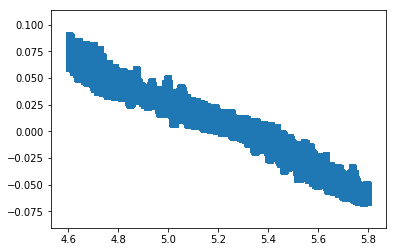

In [2]:

# linear portion of QPDx vs strainGaugeX
fit_vals = data[np.abs(data['x_volts']-5.2)<0.6]['x_strain']
fit_region = data[np.abs(data['x_volts']-5.2)<0.6]['x_volts']
plt.scatter(fit_region, fit_vals, marker=',')

print(len(fit_vals))
print(len(fit_region))

nbins=3000
bins = np.empty(nbins)




In [ ]:
from scipy import *
from scipy.optimize import leastsq
from scipy.special import gamma

# fit a line to this
# we will have p=[a, b] where line is ax+b
def fitline(x, p):
    pev = p[0]*x + p[1]
    return pev

def residuals(p, y, x, yerr):
    err = (y-fitline(x,p))/yerr
    return err

def csprob(cs, df): # chi2 probability a function of chi2 and DOF
    prob = (np.power(cs, df/2-1)*np.exp(-cs/2))/(np.power(2, df/2)*gamma(df/2))
    return prob

